In [2]:
# Import libraries

import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

In [3]:
#Upload the worksheet with the offer information

df_offers = pd.read_excel(r"C:\Users\TASHA\Desktop\WineKMC.xlsx", sheet_name='OfferInformation')
df_offers.columns = ["offer_id", "campaign", "varietal", "min_qty", "discount", "origin", "past_peak"]
df_offers.head()

,offer_id,campaign,varietal,min_qty,discount,origin,past_peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True


In [4]:
# Upload the worksheet wuth transactions

df_transactions = pd.read_excel(r"C:\Users\TASHA\Desktop\WineKMC.xlsx", sheet_name='Transactions')
df_transactions.columns = ["customer_name", "offer_id"]
df_transactions['n'] = 1
df_transactions.head()

,customer_name,offer_id,n
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1


In [35]:
# Create a data frame where each row has a customer_name column and one column for each offer, with a 1 if the customer responded to the offer.

df = df_transactions.merge(df_offers, on='offer_id')
df = df.pivot_table(index='customer_name', columns='offer_id', values='n', fill_value=0)
df.head()

offer_id,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
customer_name,,,,,,,,,,,,,,,,,,,,,
Adams,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
Allen,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
Anderson,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
Bailey,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Baker,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [36]:
# Create numpy matrix with only the columns representing the offers.

import numpy as np

print(df.columns)
x_cols = np.matrix(df[df.columns])
x_cols


Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
           dtype='int64', name='offer_id')


matrix([[0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 1, 1]], dtype=int64)

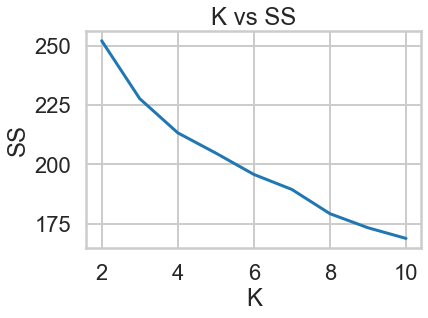

In [37]:
# Write code that applies the KMeans and plot SS for each K

from sklearn.cluster import KMeans

inertias = []
ks = range(2, 11)

for k in ks:
    kMeans_model = KMeans(n_clusters=k)
    kMeans_model.fit(x_cols)
    inertias.append(kMeans_model.inertia_)
    
plt.plot(ks, inertias)
plt.xlabel("K")
plt.ylabel("SS")
plt.title("K vs SS")
plt.show()

0 : 24
1 : 14
2 : 11
3 : 42
4 : 9


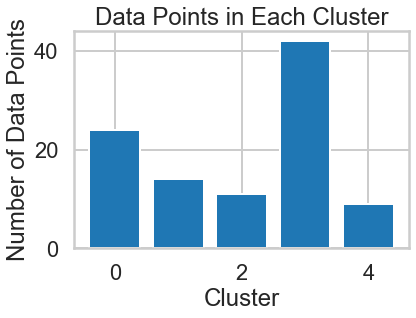

In [40]:
# Plot a bar chart showing the number of points in each cluster for k-means under the best  K

import collections

kMeans_model = KMeans(n_clusters=5, random_state=5)
clusters = kMeans_model.fit_predict(x_cols)

count_by_cluster = collections.OrderedDict(sorted(collections.Counter(clusters).items()))

plt.bar(list(count_by_cluster.keys()), list(count_by_cluster.values()))
plt.title("Data Points in Each Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of Data Points")

for k, v in count_by_cluster.items():
    print(k,":", v)

In [41]:
# Observation from plot

# From the plot, I cannot pick the best K as there's no clear point elbow point. The plot is more linear than an elbow point i.e the point at which the plot starts descending much more slowly.

For n_clusters = 2 The average silhouette_score is : 0.09174871508750351


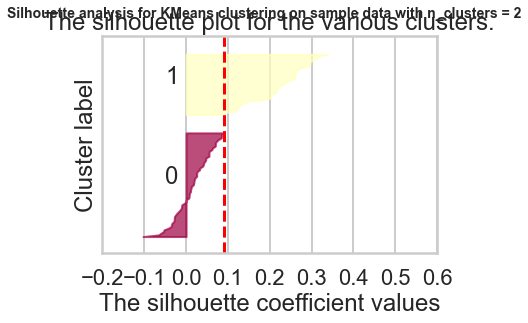

For n_clusters = 3 The average silhouette_score is : 0.1107183912025193


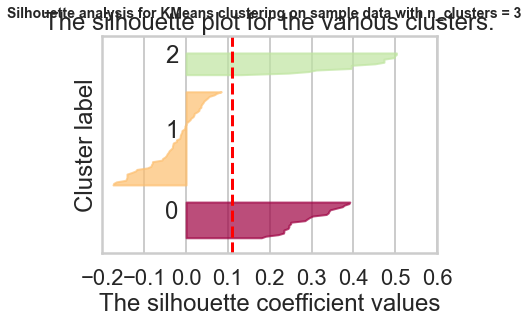

For n_clusters = 4 The average silhouette_score is : 0.12349204708263416


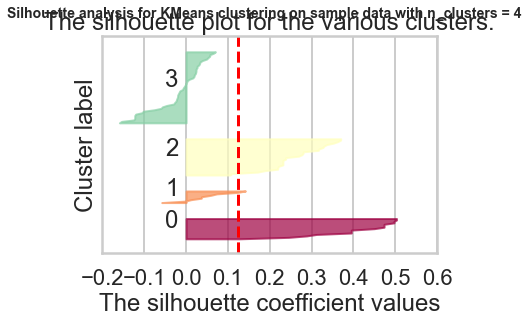

For n_clusters = 5 The average silhouette_score is : 0.11482891379977885


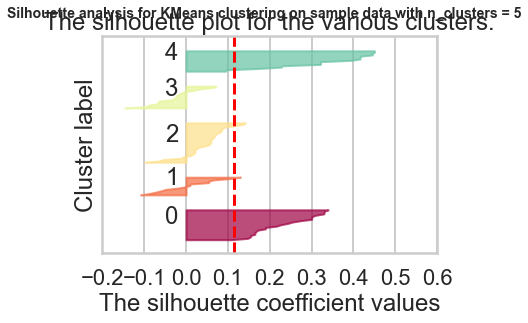

For n_clusters = 6 The average silhouette_score is : 0.11879508142787866


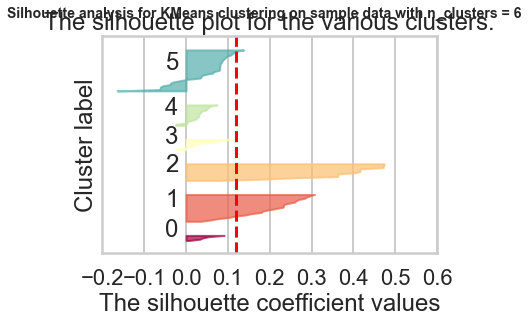

For n_clusters = 7 The average silhouette_score is : 0.10874624428071616


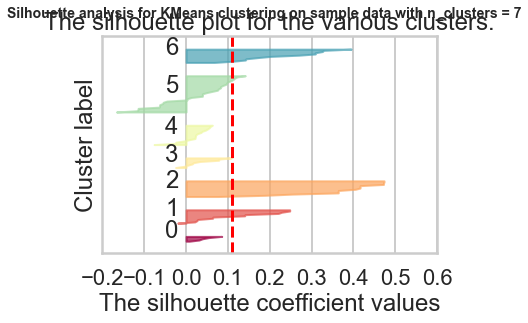

For n_clusters = 8 The average silhouette_score is : 0.14097216560635834


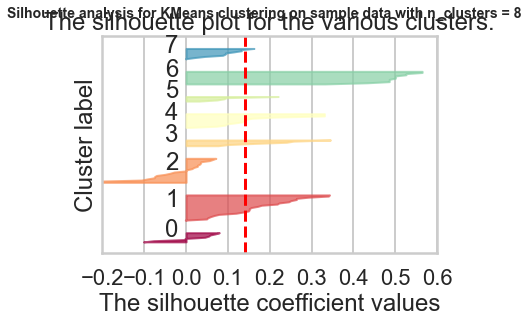

For n_clusters = 9 The average silhouette_score is : 0.14178613108021745


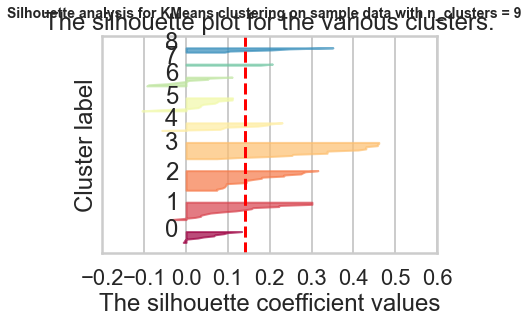

For n_clusters = 10 The average silhouette_score is : 0.12819851045484193


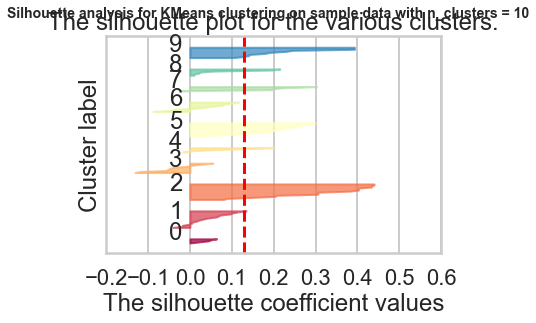

In [43]:
# Silhouette analysis

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

silhouette_score_by_k = {}

for k in ks:
    fig, (ax1) = plt.subplots(1, 1)

    ax1.set_xlim([-0.2, 0.6])
    ax1.set_ylim([0, len(x_cols) + (k + 1) * 10])

    clusterer = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusterer.fit_predict(x_cols)

    silhouette_avg = silhouette_score(x_cols, cluster_labels)
    print("For n_clusters =", k,
          "The average silhouette_score is :", silhouette_avg)
    silhouette_score_by_k[k] = silhouette_avg

    sample_silhouette_values = silhouette_samples(x_cols, cluster_labels)

    y_lower = 10
    for i in range(k):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([]) 
    ax1.set_xticks([-0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % k),
                 fontsize=14, fontweight='bold')

    plt.show()

In [44]:
# Observation from Silhoutte score

# The silhouette scores in all the plots are less than 0.25 which means that there's no substantial structure thus we can't use this to choose the best K


In [45]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components=2, random_state=5)
pca_features = pca_model.fit_transform(x_cols)
x = pca_features[:, 0]
y = pca_features[:, 1]

df_pca = pd.DataFrame({'customer_name': df.index, 
                          'cluster': clusters,
                          'x': x,
                          'y': y}).set_index('customer_name').reset_index()

df_pca.head()

,customer_name,cluster,x,y
0,Adams,0,1.007580,0.108215
1,Allen,3,-0.287539,0.044715
2,Anderson,1,-0.392032,1.038391
3,Bailey,0,0.699477,-0.022542
4,Baker,3,0.088183,-0.471695


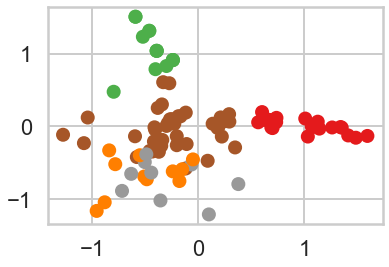

In [46]:
plt.scatter(x, y, c=clusters, cmap="Set1")
plt.show()

In [50]:
# Observation of the clusters

# The clusters are mostly overlapping each other so it doesn't give a clear picture on what to observe. This doesn't seem to give us the best K thus not suitable to make conclusions about the data.

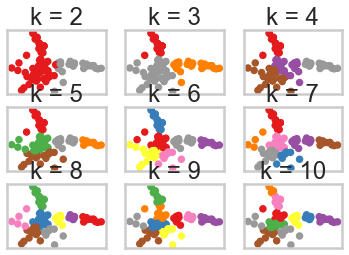

In [49]:
fig = plt.figure()
i = 1
for k in ks:
    model = KMeans(n_clusters=k, random_state=5)
    cluster_labels = model.fit_predict(pca_features)
    
    ax = fig.add_subplot(3, 3, i)
    plt.scatter(x, y, c=cluster_labels, cmap="Set1", s=30)
    plt.title("k = " + str(k))
    ax.set_yticks([]) 
    ax.set_xticks([]) 
    i += 1

In [52]:
# Initialize a new PCA model with a default number of components.

import sklearn.decomposition
pca = sklearn.decomposition.PCA()
pca.fit(X)

PCA()

[0.4096489  0.30753551 0.2022926  0.16703717 0.15015248 0.1434373
 0.13818887 0.12192294 0.11636172 0.10804271 0.09937813 0.09495961
 0.08690352 0.07256738 0.0660996  0.06245473 0.05634388 0.05327395
 0.04728801 0.04393911 0.03900424 0.03625783 0.03455714 0.03235091
 0.02940632 0.02618221 0.02308167 0.02142632 0.018814   0.0165252
 0.01426187 0.0077789 ]


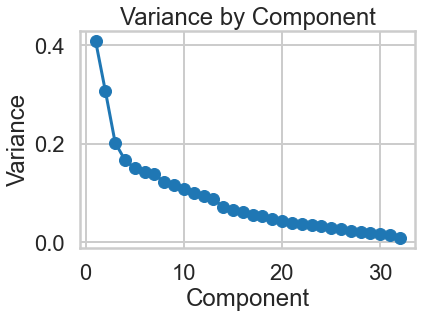

In [53]:
pca = PCA()
pca.fit(x_cols)

print(pca.explained_variance_)

plt.plot(range(1, len(pca.explained_variance_)+1), pca.explained_variance_, 'o-')
plt.xlabel('Component')
plt.ylabel('Variance')
plt.title('Variance by Component')
plt.show()

In [54]:
# Observation

# The elbow point seems to be at 5 components.

In [56]:
from sklearn.cluster import AffinityPropagation

best_score = 0
print('Affinity Propagation')
for d in np.arange(0.5, 1, 0.05):
    model = AffinityPropagation(random_state=None, damping=d)
    clusters = model.fit_predict(x_cols)

    score = silhouette_score(x_cols, clusters)
    
    if score > best_score:
        best_score = score
        
    print('damping =', d,': Silhouette score =', score)
    
print('\nBest Score =', best_score)

Affinity Propagation
damping = 0.5 : Silhouette score = 0.1286008203648164
damping = 0.55 : Silhouette score = 0.12955880925961974
damping = 0.6000000000000001 : Silhouette score = 0.1218366449898301
damping = 0.6500000000000001 : Silhouette score = 0.123786520649713
damping = 0.7000000000000002 : Silhouette score = 0.11875111966213055
damping = 0.7500000000000002 : Silhouette score = 0.11837629526345252
damping = 0.8000000000000003 : Silhouette score = 0.08116198521935847
damping = 0.8500000000000003 : Silhouette score = 0.10981886517954971
damping = 0.9000000000000004 : Silhouette score = 0.08609013944026289
damping = 0.9500000000000004 : Silhouette score = 0.10773150892825271

Best Score = 0.12955880925961974


In [57]:
from sklearn.cluster import SpectralClustering

best_score = 0
print('Spectral Clustering')
for k in ks:
    model = SpectralClustering(n_clusters=k)
    clusters = model.fit_predict(x_cols)

    score = silhouette_score(x_cols, clusters)
    
    if score > best_score:
        best_score = score
        
    print('n_clusters =', k,': Silhouette score =', score)
    
print('\nBest Score =', best_score)

Spectral Clustering
n_clusters = 2 : Silhouette score = 0.07631909829627558
n_clusters = 3 : Silhouette score = 0.10611539040197304
n_clusters = 4 : Silhouette score = 0.08627893400734331
n_clusters = 5 : Silhouette score = 0.09993402587297352
n_clusters = 6 : Silhouette score = 0.10627890916170937
n_clusters = 7 : Silhouette score = 0.08164787106585575
n_clusters = 8 : Silhouette score = 0.09056729805151383
n_clusters = 9 : Silhouette score = 0.09197674643405511
n_clusters = 10 : Silhouette score = 0.11676098706186465

Best Score = 0.11676098706186465


In [58]:
from sklearn.cluster import AgglomerativeClustering

best_score = 0
print('Agglomerative Clustering')
for k in ks:
    model = AgglomerativeClustering(n_clusters=k)
    clusters = model.fit_predict(x_cols)

    score = silhouette_score(x_cols, clusters)
    
    if score > best_score:
        best_score = score
    
    print('n_clusters =', k,': Silhouette score =', score)
    
print('\nBest Score =', best_score)

Agglomerative Clustering
n_clusters = 2 : Silhouette score = 0.08258017823184984
n_clusters = 3 : Silhouette score = 0.11625878863607858
n_clusters = 4 : Silhouette score = 0.128937578158815
n_clusters = 5 : Silhouette score = 0.14089739970831974
n_clusters = 6 : Silhouette score = 0.1471521720461323
n_clusters = 7 : Silhouette score = 0.15275152751051155
n_clusters = 8 : Silhouette score = 0.15578053718604024
n_clusters = 9 : Silhouette score = 0.12075124131971901
n_clusters = 10 : Silhouette score = 0.09754750747147792

Best Score = 0.15578053718604024


In [59]:
from sklearn.cluster import DBSCAN

best_score = 0
for e in np.arange(1, 2.6, 0.1):
    for sample in range(1,11):
        model = DBSCAN(eps= e, min_samples=sample)
        clusters = model.fit_predict(x_cols)

        if len(collections.Counter(clusters).keys()) > 1:
            score = silhouette_score(x_cols, clusters)
            
            if score > best_score:
                best_score = score
            
            print('eps=', e, ', min_samples=', sample, ': Silhouette score =', score)
            
print('\nBest Score =', best_score)

eps= 1.0 , min_samples= 1 : Silhouette score = 0.04870222224659934
eps= 1.0 , min_samples= 2 : Silhouette score = 0.025452229723455587
eps= 1.0 , min_samples= 3 : Silhouette score = 0.03831616142184094
eps= 1.0 , min_samples= 4 : Silhouette score = 0.041771182765493825
eps= 1.0 , min_samples= 5 : Silhouette score = 0.012715203274911742
eps= 1.0 , min_samples= 6 : Silhouette score = 0.020528683190337592
eps= 1.0 , min_samples= 7 : Silhouette score = -0.012845075134807156
eps= 1.0 , min_samples= 8 : Silhouette score = 0.008825398541220098
eps= 1.0 , min_samples= 9 : Silhouette score = 0.057334735345001414
eps= 1.0 , min_samples= 10 : Silhouette score = 0.057334735345001414
eps= 1.1 , min_samples= 1 : Silhouette score = 0.04870222224659934
eps= 1.1 , min_samples= 2 : Silhouette score = 0.025452229723455587
eps= 1.1 , min_samples= 3 : Silhouette score = 0.03831616142184094
eps= 1.1 , min_samples= 4 : Silhouette score = 0.041771182765493825
eps= 1.1 , min_samples= 5 : Silhouette score = 0.0

In [60]:
#Observation

# From the above models, the best to use would be DBSCAN with a silhouette score of 0.27. However this structure is still weak to draw any conclusions.